In [320]:
# *** IMPORTED PACKAGES ***
##Python 3
import numpy as np
import matplotlib.pyplot as plt
import array
import random
import pandas as pd


In [321]:
##Generate NK Landscape
N = 3 
K = 0 
NK_land = np.random.rand(N, 2**(K+1))

In [322]:
# Generate a random position on Landscape
##INPUTS
#N - N 
def Position_rand(N):
    Pos = (np.random.rand(N)>0.5)
    Pos = Pos.astype(int)
    Position = np.repeat(Pos,N)
    Position = np.full((N, N), Pos, dtype=int)
    return(Position[1])

In [328]:
##get Fitness
#This function gets the fitness averaged across the N variables for a given interaction position on a Landscape
###Inputs:
###Landscape - Landscape Values
###Position - Your Current Position / vector of Interactions
###Output  - Average fitness
def get_fitness(Landscape,Position):
    N=len(Landscape)
    totalFitness = 0
    #Loop through all N
    for currIndex in np.arange(N):
        #get the fitness indices from each k based upon local gene values
        localgenes = Position[currIndex:currIndex+K+1]
        #loop through to next if were are near the nth index
        if currIndex+K+1 > N:
            localgenes = np.append(localgenes,Position[ 0:currIndex-(N-K)+1])
        #get index fitness  is stored at
        interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
        #update fitness
        totalFitness = totalFitness + Landscape[currIndex,interactIndex]
    return(totalFitness/N)

In [642]:
#get_fitness(NK_land,[1,0,1])

In [330]:
## Create a Random Walker, that will for randomly walk across the landscape
## Inputs: Steps, initPosition, Landscape
## Steps - Number of steps the walker takes
## initPosition - inital postition of walker
## Landscape - Input of landscape values
### Outputs: FitnessTime
## FitnessHistory - Fitness recorded over time of the random walker

def random_walker(Steps, initPosition, Landscape):
    #Get N
    N=len(Landscape)

    #Set current position
    currPosition = initPosition
    
    #Get first fitness value
    FitnessHistory=get_fitness(Landscape,currPosition)

    for s in range(Steps):
        #Take a step by picking a random gene to change
        toChange = random.randint(0,N-1)
        #this changes 0 to 1 and 1 to zero
        currPosition[toChange] = abs(currPosition[toChange]-1)
        #Append to fitness data
        FitnessHistory =  np.append(FitnessHistory,get_fitness(Landscape,currPosition))

    return(FitnessHistory)


Plot the random walker to illustrate landscape fitness variation

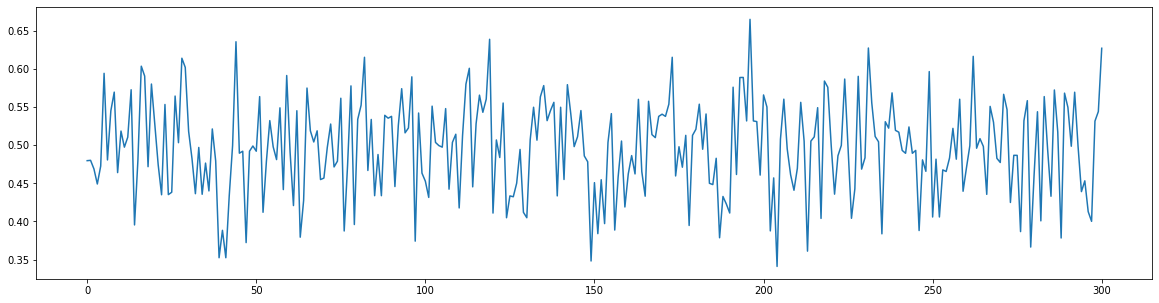

In [643]:
N = 20
K = 19

NK_land = np.random.rand(N, 2**(K+1))
iPosition = Position_rand(N)
numSteps=300
FitnessPath = random_walker(numSteps,initPosition = iPosition,Landscape = NK_land)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath)
plt.show()

In [644]:
## Now its time to play with creating various Landscapes

## Now we wish to alter the landscape a bit.
Fundamentally it seems we may do two different things.
1. We may alter intra-gene fitness correlation, that is a changing gene 2 won't change the fitness contribution of it to gene 1 much
2. We may alter cross-gene fitness correlation, that is changing gene 2 alters the aggregate fitness contribution of gene 1 and gene 2 in similar ways.

However we wish for the least cludgy/simplest code possible/simplest model. (Noting that an NK model could be built in as little as one line of code!)

eg if k=2 gene 1's contribution fitness depends upon three genes. There are 2^3 combinations:
[0,0,0]
[0,0,1]
[0,1,0]
[1,0,0]
[0,1,1]
[1,0,1]
[1,1,0]
[1,1,1]

The (Manhattan) distance between any two of these ranges from 1 (e.g. [1,1,1] to [0,1,1]) to 3 (E.g. [0,1,0] to [1,0,1)





A way to induce correlation along intra-gene contributions would be ensure that fitness is correlated with Manhattan Distance)

We could do this (here where k=2) by specifying draw from some distribution for each underlying gene and then say multiplying or adding the contributions.

Perhaps we could try multiplying draws from a production distribution of uniform random variables $X$ ~ $U$

Multiplying may be better as $Var(X_1*X_2*...X_n) = \Pi_{1}^n (\sigma_i^2 +\mu_i^2)-\Pi_1^N\mu_i^2$



### Strategy
1. Generate fitness contributions (per gene) drawn from U[0.5,1.5] for each of the K twice (a value for 0 and a value for 1)

2. This implies the generation of an N * 2(K+1) matrix. As we must access for each of the N genes any possible activations of the relevant gene and K local gene. (This also is a nice model in that whereas the traditional NK model generated a an N by 2^(K+1) matrix, ours is much smaller as only N by 2(K+1) - but with the computational cost realized at accessing the values as multiplication is applied).




In [652]:
##get Fitness for our New Type of NK Landscape
#This function gets the fitness averaged across the N variables for a given interaction position on our new Landscape
###Inputs:
###Landscape - Landscape Values
###Position - Your Current Position / vector of Interactions
###Output  - Average fitness
def get_fitness_Product_World(Landscape, Position):
    N=len(Landscape)
    K=int(len(Landscape[0])/2-1)
    totalFitness = 0
    IndexLocations=Position+2*np.array(range(len(Position)))
    #get columns to access
    Cols = Position+2*np.array(range(len(Position)))
    for NIndex in np.arange(N):
        #get the relevant local gene values that are relevant for each N in the proper order
        localGenes = Position[NIndex:NIndex+K+1]
        if NIndex+K+1 > N: # go to beginning of vector for last N
            localGenes = np.append(localGenes,Position[ 0:NIndex-(N-K)+1])
            
        #get index locations based upon local genes
        IndexLocations=localGenes+2*np.array(range(len(localGenes)))
        #get locally stored values
        LocalValues = NK_World[NIndex,IndexLocations]
        #get fitness contribution of gene by multiplying
        LocalFitness = np.prod(LocalValues)
        #update total fitness
        totalFitness = totalFitness + LocalFitness

    return(totalFitness/N)

In [649]:
#test case
N=10
K=8
NK_World = np.random.rand(N, 2*(K+1))*2 #multiply by two so it is uniform [0,2]
NK_World
get_fitness_Product_World(NK_World,[1,0,1,1,0,0,0,0,0,1])

0.38822284595742473

In [810]:
###now repeat above graphical analysis

In [397]:
## Create a Random Walker, that will for randomly walk across the landscape in our modified NK-Landscape
## Inputs: Steps, initPosition, Landscape
## Steps - Number of steps the walker takes
## initPosition - inital postition of walker
## Landscape - Input of landscape values
### Outputs: FitnessTime
## FitnessHistory - Fitness recorded over time of the random walker

def random_walker_newNK(Steps, initPosition, Landscape):
    #Get N
    N=len(Landscape)
    
    #Set current position
    currPosition = initPosition
    
    #Get first fitness value
    FitnessHistory=get_fitness_Product_World(Landscape,currPosition)

    for s in range(Steps):
        #Take a step by picking a random gene to change
        toChange = random.randint(0,N-1)
        #this changes 0 to 1 and 1 to zero
        currPosition[toChange] = abs(currPosition[toChange]-1)
        #Append to fitness data
        FitnessHistory =  np.append(FitnessHistory,get_fitness_Product_World(Landscape,currPosition))

    return(FitnessHistory)


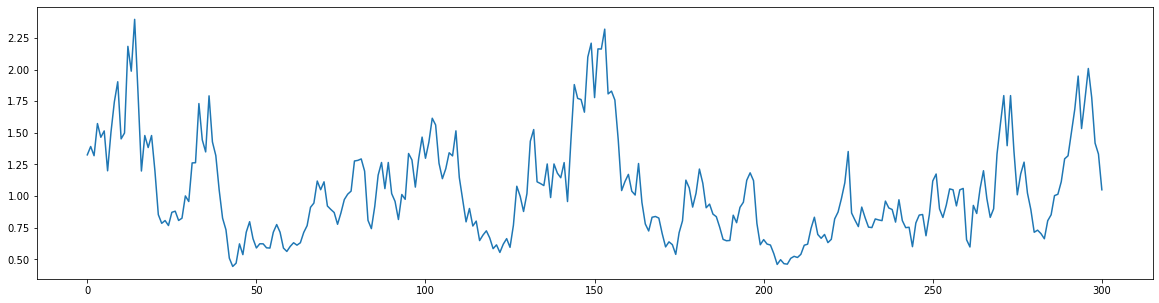

In [651]:
##Plot, may vary N and K
N=20
K=19
NK_World = (0.5+np.random.rand(N, 2*(K+1))) #add by 0.5 so it is uniform[0.5,1.5]

#set initial position
iPosition = Position_rand(N)
#set number of steps
numSteps=300
FitnessPath = random_walker_newNK(numSteps, initPosition = iPosition,Landscape = NK_World)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath)
plt.show()

In [ ]:
##plot the Orginal NK random walker too
N = 20
K = 19

NK_land = np.random.rand(N, 2**(K+1))
iPosition = Position_rand(N)
numSteps=300
FitnessPath = random_walker(numSteps,initPosition = iPosition,Landscape = NK_land)

##plot the data
plt.figure(figsize=(20,5))
plt.plot(FitnessPath)
plt.show()